In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from scipy.stats import kstest
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 3.6

In [2]:
q1 = pd.read_csv(r'./data/m-mrk4608.txt', sep='\s+')


In [3]:
q1

,date,mrk
0,19460628,-0.025926
1,19460731,-0.030534
2,19460830,0.043307
3,19460930,-0.105660
4,19461031,-0.008475
...,...,...
746,20080829,0.084194
747,20080930,-0.104570
748,20081031,-0.019328
749,20081128,-0.136672


In [4]:
from math import log
r = q1['mrk'].copy(deep=True)
r = r.apply(lambda x: log(1+x))

In [5]:
r

0     -0.026268
1     -0.031010
2      0.042395
3     -0.111669
4     -0.008511
         ...   
746    0.080837
747   -0.110451
748   -0.019517
749   -0.146961
750    0.141453
Name: mrk, Length: 751, dtype: float64

## 3.6(a)

In [6]:
from statsmodels.stats.diagnostic import acorr_ljungbox as lb_test
lb_test(r,lags=None,boxpierce=False)

,lb_stat,lb_pvalue
1,4.640302,0.031230
2,5.434009,0.066072
3,5.582673,0.133777
4,9.999002,0.040444
5,10.040744,0.074089
6,10.186069,0.117032
7,11.214699,0.129524
8,19.485115,0.012470
9,20.317454,0.016051
10,20.416924,0.025547


从Ljung_Box检验可以看出，在显著性5%的水平上，一阶延迟的p值就小于0.05，故存在明显的序列相关性。
消除序列相关性，考虑建立ARMA模型。

c:\Users\20123\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


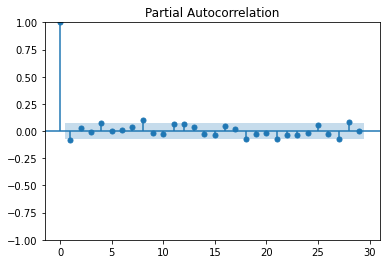

In [7]:
plot_pacf(r)
plt.show() ##取3比较合适

即建立AR（1）模型

In [10]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(r, order=(1,0,0))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    mrk   No. Observations:                  751
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 926.777
Date:                Mon, 16 May 2022   AIC                          -1847.553
Time:                        19:14:19   BIC                          -1833.689
Sample:                             0   HQIC                         -1842.211
                                - 751                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0108      0.002      4.490      0.000       0.006       0.016
ar.L1         -0.0788      0.034     -2.310      0.021      -0.146      -0.012
sigma2         0.0050      0.000     22.832      0.000       0.005       0.005
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                28.75
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.23   Skew:                            -0.21
Prob(H) (two-sided):                  0.10   Kurtosis:                         3.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## 3.6(b)

In [11]:
res = result.resid
lb_test(res**2,lags=12,boxpierce=False)

,lb_stat,lb_pvalue
1,2.732877,0.098302
2,8.423642,0.014819
3,17.320543,0.000607
4,21.499782,0.000252
5,21.580872,0.000629
6,21.604014,0.001428
7,21.860455,0.002685
8,22.746775,0.003705
9,26.206759,0.001890
10,29.202030,0.001156


从检验结果看出，6个间隔在5%显著性水平下有ARCH效应，但12个间隔在5%显著性水平下也存在ARCH效应。

## 3.6(c)

c:\Users\20123\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


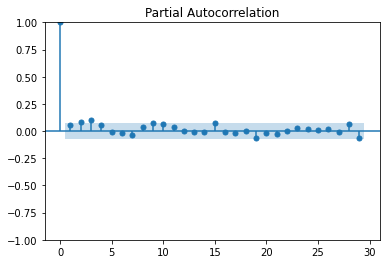

In [12]:
plot_pacf(res**2)
plt.show() ##取3比较合适

In [13]:
from arch import arch_model
am = arch_model(r,mean='AR',lags=1,vol='ARCH',p=3) 
res = am.fit()
res.summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 1151191.5348212253
Iteration:      2,   Func. Count:     20,   Neg. LLF: -177.42677713764252
Iteration:      3,   Func. Count:     30,   Neg. LLF: 307383.9238676762
Iteration:      4,   Func. Count:     39,   Neg. LLF: 175728.49078859395
Iteration:      5,   Func. Count:     49,   Neg. LLF: -817.7779051621974
Iteration:      6,   Func. Count:     58,   Neg. LLF: -916.6544733580982
Iteration:      7,   Func. Count:     66,   Neg. LLF: -932.1862344145208
Iteration:      8,   Func. Count:     73,   Neg. LLF: -932.3797964682774
Iteration:      9,   Func. Count:     80,   Neg. LLF: -920.7241506638396
Iteration:     10,   Func. Count:     89,   Neg. LLF: -932.4581536336293
Iteration:     11,   Func. Count:     96,   Neg. LLF: -932.4597360752776
Iteration:     12,   Func. Count:    103,   Neg. LLF: -932.4597588328202
Iteration:     13,   Func. Count:    109,   Neg. LLF: -932.4597588328573
Optimization terminated successfully    (Exit mode 

c:\Users\20123\AppData\Local\Programs\Python\Python38\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.004967. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - ARCH Model Results                            
==============================================================================
Dep. Variable:                    mrk   R-squared:                       0.006
Mean Model:                        AR   Adj. R-squared:                  0.005
Vol Model:                       ARCH   Log-Likelihood:                932.460
Distribution:                  Normal   AIC:                          -1852.92
Method:            Maximum Likelihood   BIC:                          -1825.20
                                        No. Observations:                  750
Date:                Mon, May 16 2022   Df Residuals:                      748
Time:                        19:14:23   Df Model:                            2
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
Const          0.0130  2.696e-03      4.806  1.542e-06 [7.671e-03,1.824e-02]
mrk[1]        -0.0786  3.698e-02     -2.126  3.354e-02  [ -0.151,-6.126e-03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      4.0521e-03  4.076e-04      9.942  2.736e-23  [3.253e-03,4.851e-03]
alpha[1]       0.0200  3.602e-02      0.556      0.578 [-5.058e-02,9.061e-02]
alpha[2]       0.0747  4.331e-02      1.725  8.454e-02   [-1.018e-02,  0.160]
alpha[3]       0.0869  4.123e-02      2.109  3.498e-02    [6.129e-03,  0.168]
=============================================================================

Covariance estimator: robust
"""

其中，
$$ r_t = \mu + a_t,\ \mu = 0.0130 -0.0786r_{t-1},\ a_t = \sigma_t\varepsilon_t,\ \sigma^2_t = 4.0521*10^{-3} + 0.0200a^2_{t-1} + 0.0747a^2_{t-2} + 0.0869a^2_{t-3} $$

# 3.7

In [14]:
q2 = pd.read_csv(r'./data/m-3m4608.txt', sep='\s+')

In [15]:
q2

,date,rtn
0,19460228,-0.077922
1,19460330,0.018592
2,19460430,-0.100000
3,19460531,0.209877
4,19460628,0.005128
...,...,...
750,20080829,0.024293
751,20080930,-0.045950
752,20081031,-0.058703
753,20081128,0.048678


In [16]:
r = q2['rtn'].copy(deep=True)
r = r.apply(lambda x: log(1+x))

## 3.7(a)

In [17]:
lb_test(r**2,lags=12,boxpierce=False)

,lb_stat,lb_pvalue
1,4.593942,0.032085
2,13.565673,0.001133
3,19.039651,0.000268
4,21.401004,0.000264
5,23.234832,0.000304
6,24.446801,0.000432
7,26.308965,0.000443
8,26.591164,0.000832
9,29.634968,0.000506
10,32.440053,0.000338


从检验结果看出，6个间隔在5%显著性水平下有ARCH效应，但12个间隔在5%显著性水平下也存在ARCH效应。

## 3.7(b)

c:\Users\20123\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


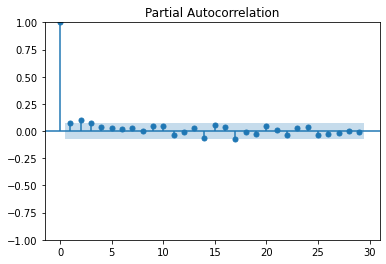

In [18]:
plot_pacf(r**2)
plt.show() 

从pacf看出，应该选择ARCH（2）

## 3.7(c)

c:\Users\20123\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


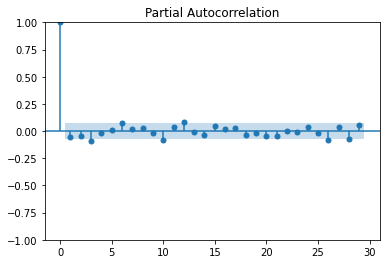

In [19]:
plot_pacf(r)
plt.show() 

In [20]:
r0 = r[:751]
am = arch_model(r0,mean='AR',lags=3,vol='arch',p=2,dist='Normal') 
res = am.fit()
res.summary()

Iteration:      1,   Func. Count:      9,   Neg. LLF: 207794.60716385764
Iteration:      2,   Func. Count:     23,   Neg. LLF: 1558535.465713152
Iteration:      3,   Func. Count:     34,   Neg. LLF: 1672471.1463057566
Iteration:      4,   Func. Count:     44,   Neg. LLF: -743.5688464111258
Iteration:      5,   Func. Count:     55,   Neg. LLF: 262.44570208994037
Iteration:      6,   Func. Count:     66,   Neg. LLF: 515.3583499222219
Iteration:      7,   Func. Count:     77,   Neg. LLF: -1008.8215544395578
Iteration:      8,   Func. Count:     86,   Neg. LLF: -1014.8385829338597
Iteration:      9,   Func. Count:     95,   Neg. LLF: -1017.0231947992522
Iteration:     10,   Func. Count:    103,   Neg. LLF: -1017.0189666149173
Iteration:     11,   Func. Count:    112,   Neg. LLF: -1017.0234622917793
Iteration:     12,   Func. Count:    119,   Neg. LLF: -1017.0234622917859
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1017.0234622917793
          

c:\Users\20123\AppData\Local\Programs\Python\Python38\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.003958. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - ARCH Model Results                            
==============================================================================
Dep. Variable:                    rtn   R-squared:                       0.014
Mean Model:                        AR   Adj. R-squared:                  0.010
Vol Model:                       ARCH   Log-Likelihood:                1017.02
Distribution:                  Normal   AIC:                          -2020.05
Method:            Maximum Likelihood   BIC:                          -1987.73
                                        No. Observations:                  748
Date:                Mon, May 16 2022   Df Residuals:                      744
Time:                        19:14:27   Df Model:                            4
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
Const          0.0132  2.372e-03      5.570  2.552e-08 [8.561e-03,1.786e-02]
rtn[1]        -0.0619  3.870e-02     -1.601      0.109   [ -0.138,1.390e-02]
rtn[2]        -0.0491  4.328e-02     -1.134      0.257   [ -0.134,3.574e-02]
rtn[3]        -0.0879  3.881e-02     -2.265  2.349e-02  [ -0.164,-1.185e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      3.1602e-03  2.628e-04     12.024  2.673e-33 [2.645e-03,3.675e-03]
alpha[1]       0.0723  5.833e-02      1.240      0.215  [-4.197e-02,  0.187]
alpha[2]       0.1290  7.385e-02      1.747  8.071e-02  [-1.576e-02,  0.274]
============================================================================

Covariance estimator: robust
"""

In [21]:
pre = res.forecast(horizon=5,method="simulation",reindex=False) ## python下标从0开始
# forecasts = res.forecast()
print(pre.mean.iloc[-5:])

          h.1       h.2      h.3       h.4       h.5
750  0.020695  0.009745  0.00948  0.010325  0.011248


上述结果打印即为最后一项结束后的5步预测

## 3.7(d)

In [22]:
# from arch.univariate import HARX
# from arch.univariate.volatility import GARCH, FixedVariance,ARCH
# harx = HARX(r, lags=[1, 1, 1],volatility=ARCH(2))
# res = harx.fit()
# res.summary()

考虑到经过查阅资料，包括arch官网的说明文档，发现python中暂时找不到做ARCH-M的库，因此，该问在RStdio中重新做。

## 3.7(e)

In [23]:
am = arch_model(r0,mean='AR',lags=3,vol='EGARCH',p=2,dist='Normal') 
res = am.fit()
res.summary()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 1016670560631.095
Iteration:      2,   Func. Count:     25,   Neg. LLF: 5270039049.596655
Iteration:      3,   Func. Count:     37,   Neg. LLF: 3366238410.7572794
Iteration:      4,   Func. Count:     49,   Neg. LLF: -412.14179650888286
Iteration:      5,   Func. Count:     61,   Neg. LLF: -893.8136636812159
Iteration:      6,   Func. Count:     72,   Neg. LLF: -890.5752710071177
Iteration:      7,   Func. Count:     84,   Neg. LLF: -1013.0130238122252
Iteration:      8,   Func. Count:     95,   Neg. LLF: -725.0914694203431
Iteration:      9,   Func. Count:    107,   Neg. LLF: -1020.706522232405
Iteration:     10,   Func. Count:    116,   Neg. LLF: -1020.723207649796
Iteration:     11,   Func. Count:    125,   Neg. LLF: -1020.7232768695637
Iteration:     12,   Func. Count:    134,   Neg. LLF: -1020.7232864961741
Iteration:     13,   Func. Count:    144,   Neg. LLF: -1020.7232816024066
Optimization terminated successfully    (Exit mo

c:\Users\20123\AppData\Local\Programs\Python\Python38\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.003958. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                          AR - EGARCH Model Results                           
==============================================================================
Dep. Variable:                    rtn   R-squared:                       0.014
Mean Model:                        AR   Adj. R-squared:                  0.010
Vol Model:                     EGARCH   Log-Likelihood:                1020.72
Distribution:                  Normal   AIC:                          -2025.45
Method:            Maximum Likelihood   BIC:                          -1988.51
                                        No. Observations:                  748
Date:                Mon, May 16 2022   Df Residuals:                      744
Time:                        19:14:31   Df Model:                            4
                                  Mean Model                                  
==============================================================================
                 coef    std err          t      P>|t|        95.0% Conf. Int.
------------------------------------------------------------------------------
Const          0.0124  1.783e-03      6.927  4.294e-12   [8.857e-03,1.585e-02]
rtn[1]        -0.0583  4.004e-02     -1.457      0.145     [ -0.137,2.013e-02]
rtn[2]        -0.0429  1.193e-02     -3.601  3.175e-04 [-6.632e-02,-1.957e-02]
rtn[3]        -0.0985  4.543e-03    -21.690 2.567e-104    [ -0.107,-8.963e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         -1.7854      2.376     -0.751      0.452    [ -6.443,  2.872]
alpha[1]       0.1292  8.812e-02      1.466      0.143 [-4.349e-02,  0.302]
alpha[2]       0.1583      0.272      0.583      0.560    [ -0.374,  0.690]
beta[1]        0.6786      0.429      1.582      0.114    [ -0.162,  1.519]
===========================================================================

Covariance estimator: robust
"""

In [24]:
pre = res.forecast(horizon=5,method="simulation",reindex=False) ## python下标从0开始
print(pre.mean.iloc[-5:])

          h.1       h.2       h.3       h.4       h.5
750  0.021146  0.008962  0.008556  0.009385  0.010554
